In [74]:
# Importing necessary libraries

import pandas as pd
import numpy as np
import re
import datetime
import matplotlib.pyplot as plt
import platform



In [75]:
print(platform.python_version())


3.11.0


In [2]:
# opening needed sheet from the excel file

file_path = '/Users/mehrac/Desktop/DSA-Python/data_cleaning.xlsx'

sheet_name = 'Usage'

df = pd.read_excel(file_path, sheet_name=sheet_name, header=None)

In [3]:
df.head()

,0
0,3 PM Mon 24th-Mar-2014___0.384 kwh
1,5AM 15-Aug-2014___1.201 kwh
2,__8PM Thu 20-Mar-2014____1.523 kwh
3,6PM 23rd-Apr-2014___0.424 kwh
4,_1AM Friday 19th-Dec-2014___0.209 kwh


In [13]:
# Lets try to clean the data by extracting hour, AM/PM, day, month, year and kwh usage from each row in df

pattern=re.compile(r'(?P<hour>\d+)\s?([AMP]{2})\s+[A-Za-z]*\s*(?P<day>\d+)(?:th|rd|st|nd)*-(?P<month>[A-Za-z]{3})-(?P<year>\d{4})_+(?P<kwh>\d+\.\d+)')
hour=[]
am_pm=[]
day=[]
month=[]
year=[]
kwh=[]
for row in df.values.reshape(1, -1)[0]:
    result=pattern. findall(row) [0]
    hour.append (result[0])
    am_pm.append(result[1])
    day.append(result[2])
    month.append(result[3])
    year.append (result[4])
    kwh.append(result[5])
    
clean_df=pd.DataFrame({
    'hour': hour,
    'AM/PM':am_pm,
    'day' : day,
    'month': month,
    'year': year,
    'kwh':kwh,
    'original_data':df.values.reshape(1,-1)[0]})

time_func= lambda x:pd.to_datetime(f"{x['year']}-{x['month']}-{x['day']} {x['hour']}{x['AM/PM']}")
clean_df['full_time']=clean_df.apply(func=time_func, axis=1)

In [14]:
# Lets see the clean df

clean_df

,hour,AM/PM,day,month,year,kwh,original_data,full_time
0,3,PM,24,Mar,2014,0.384,3 PM Mon 24th-Mar-2014___0.384 kwh,2014-03-24 15:00:00
1,5,AM,15,Aug,2014,1.201,5AM 15-Aug-2014___1.201 kwh,2014-08-15 05:00:00
2,8,PM,20,Mar,2014,1.523,__8PM Thu 20-Mar-2014____1.523 kwh,2014-03-20 20:00:00
3,6,PM,23,Apr,2014,0.424,6PM 23rd-Apr-2014___0.424 kwh,2014-04-23 18:00:00
4,1,AM,19,Dec,2014,0.209,_1AM Friday 19th-Dec-2014___0.209 kwh,2014-12-19 01:00:00
...,...,...,...,...,...,...,...,...
8755,1,AM,07,Nov,2014,0.084,_1AM Fri 07th-Nov-2014_0.084 kwh,2014-11-07 01:00:00
8756,6,AM,20,May,2014,1.027,_6AM 20-May-2014__1.027 kwh,2014-05-20 06:00:00
8757,2,AM,8,Apr,2014,0.052,__2 AM Tuesday 8th-Apr-2014___0.052 kwh,2014-04-08 02:00:00
8758,9,PM,27,Jan,2014,1.428,9 PM 27th-Jan-2014_1.428 kwh,2014-01-27 21:00:00


In [12]:
# Lets try to sort all rows according to time and date

time_series_data=clean_df.set_index('full_time')
time_series_data['kwh']=time_series_data['kwh'].astype('float')
time_series_data['week day']=(time_series_data.index.weekday+1)
time_series_data.sort_index(ascending=True, inplace=True)


,hour,AM/PM,day,month,year,kwh,original_data,week day
full_time,,,,,,,,
2014-01-01 00:00:00,12,AM,1,Jan,2014,0.684,__12AM 1st-Jan-2014_0.684 kwh,3
2014-01-01 01:00:00,1,AM,1,Jan,2014,0.340,_1AM Wednesday 1st-Jan-2014__0.34 kwh,3
2014-01-01 02:00:00,2,AM,01,Jan,2014,0.332,2 AM Wed 01-Jan-2014_0.332 kwh,3
2014-01-01 03:00:00,3,AM,1,Jan,2014,0.396,_3AM Wednesday 1-Jan-2014___0.396 kwh,3
2014-01-01 04:00:00,4,AM,01,Jan,2014,0.388,__4AM 01-Jan-2014_0.388 kwh,3
2014-01-01 05:00:00,5,AM,01,Jan,2014,2.354,_5 AM 01st-Jan-2014_2.354 kwh,3
2014-01-01 06:00:00,6,AM,1,Jan,2014,2.304,6 AM Wed 1-Jan-2014__2.304 kwh,3
2014-01-01 07:00:00,7,AM,1,Jan,2014,1.530,7 AM Wed 1st-Jan-2014___1.53 kwh,3
2014-01-01 08:00:00,8,AM,1,Jan,2014,0.656,_8AM Wed 1st-Jan-2014___0.656 kwh,3


In [16]:
# Lets see the resulted sorted df

time_series_data.head(25)

,hour,AM/PM,day,month,year,kwh,original_data,week day
full_time,,,,,,,,
2014-01-01 00:00:00,12,AM,1,Jan,2014,0.684,__12AM 1st-Jan-2014_0.684 kwh,3
2014-01-01 01:00:00,1,AM,1,Jan,2014,0.340,_1AM Wednesday 1st-Jan-2014__0.34 kwh,3
2014-01-01 02:00:00,2,AM,01,Jan,2014,0.332,2 AM Wed 01-Jan-2014_0.332 kwh,3
2014-01-01 03:00:00,3,AM,1,Jan,2014,0.396,_3AM Wednesday 1-Jan-2014___0.396 kwh,3
2014-01-01 04:00:00,4,AM,01,Jan,2014,0.388,__4AM 01-Jan-2014_0.388 kwh,3
2014-01-01 05:00:00,5,AM,01,Jan,2014,2.354,_5 AM 01st-Jan-2014_2.354 kwh,3
2014-01-01 06:00:00,6,AM,1,Jan,2014,2.304,6 AM Wed 1-Jan-2014__2.304 kwh,3
2014-01-01 07:00:00,7,AM,1,Jan,2014,1.530,7 AM Wed 1st-Jan-2014___1.53 kwh,3
2014-01-01 08:00:00,8,AM,1,Jan,2014,0.656,_8AM Wed 1st-Jan-2014___0.656 kwh,3


In [17]:
# Lets strip the '0' from day columns
 
time_series_data['day'] = time_series_data['day'].str.lstrip('0')
time_series_data.head(10)

,hour,AM/PM,day,month,year,kwh,original_data,week day
full_time,,,,,,,,
2014-01-01 00:00:00,12,AM,1,Jan,2014,0.684,__12AM 1st-Jan-2014_0.684 kwh,3
2014-01-01 01:00:00,1,AM,1,Jan,2014,0.340,_1AM Wednesday 1st-Jan-2014__0.34 kwh,3
2014-01-01 02:00:00,2,AM,1,Jan,2014,0.332,2 AM Wed 01-Jan-2014_0.332 kwh,3
2014-01-01 03:00:00,3,AM,1,Jan,2014,0.396,_3AM Wednesday 1-Jan-2014___0.396 kwh,3
2014-01-01 04:00:00,4,AM,1,Jan,2014,0.388,__4AM 01-Jan-2014_0.388 kwh,3
2014-01-01 05:00:00,5,AM,1,Jan,2014,2.354,_5 AM 01st-Jan-2014_2.354 kwh,3
2014-01-01 06:00:00,6,AM,1,Jan,2014,2.304,6 AM Wed 1-Jan-2014__2.304 kwh,3
2014-01-01 07:00:00,7,AM,1,Jan,2014,1.530,7 AM Wed 1st-Jan-2014___1.53 kwh,3
2014-01-01 08:00:00,8,AM,1,Jan,2014,0.656,_8AM Wed 1st-Jan-2014___0.656 kwh,3


In [19]:
# in case data contains dublicates, lets remove them


def duplicate_check_remove(data):
    num_duplicates = data.duplicated().sum()
    if num_duplicates > 0:
        print(f'The number of duplicate rows before: {num_duplicates}')
        data.drop_duplicates(inplace = True)
        print(f'The number of duplicate rows now: {data.duplicated().sum()}')
    else:
        print('There are no duplicate rows in the data set.')
        
duplicate_check_remove(time_series_data)

The number of duplicate rows before: 6
The number of duplicate rows now: 0


In [21]:
# Lets visualize daily values in our data


time_series_kwh=time_series_data.copy()
time_series_kwh.drop(columns=['hour', 'AM/PM', 'day', 'month', 'year', 'original_data','week day'], inplace=True)
time_series_kwh.head()



,kwh
full_time,
2014-01-01 00:00:00,0.684
2014-01-01 01:00:00,0.340
2014-01-01 02:00:00,0.332
2014-01-01 03:00:00,0.396
2014-01-01 04:00:00,0.388


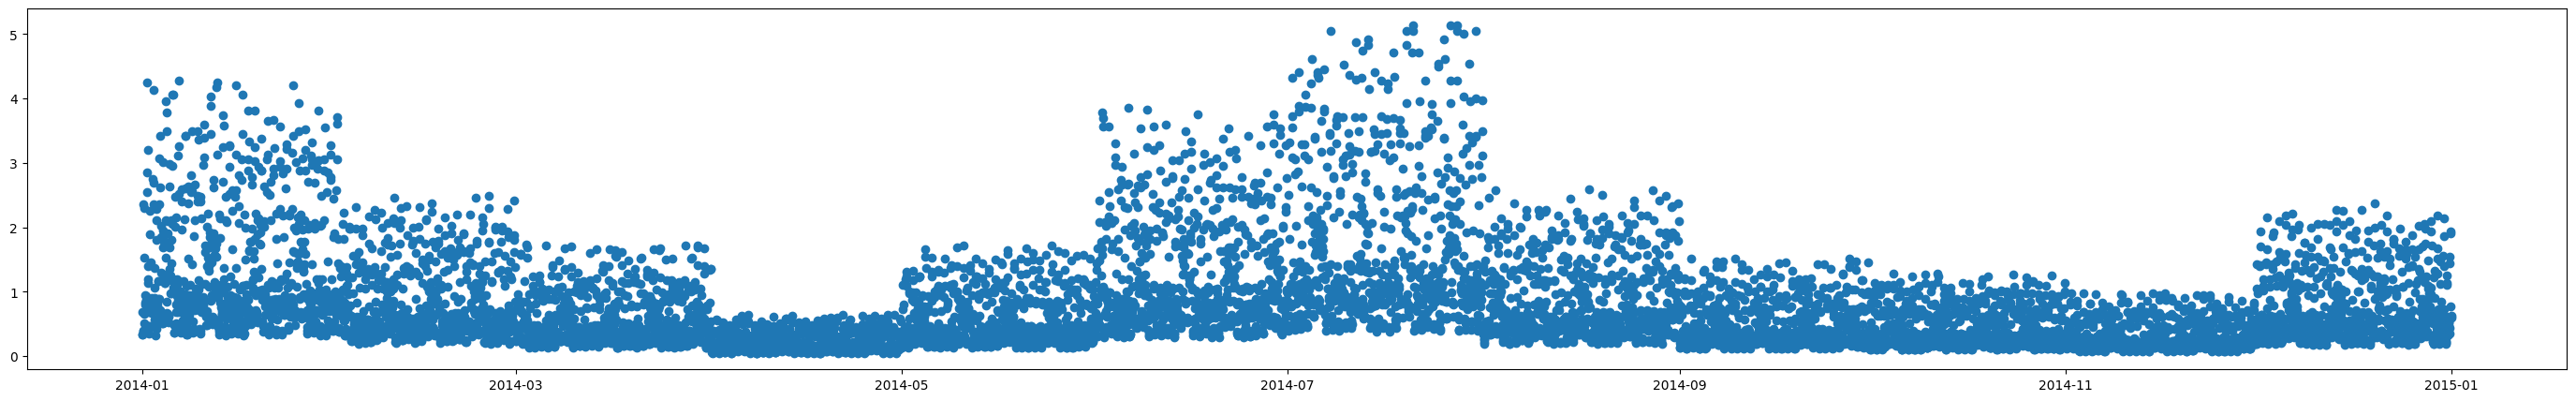

In [26]:
%matplotlib inline
plt.figure(figsize=(35, 5))
plt.scatter(time_series_kwh.index, time_series_kwh["kwh"])

<Axes: xlabel='full_time'>

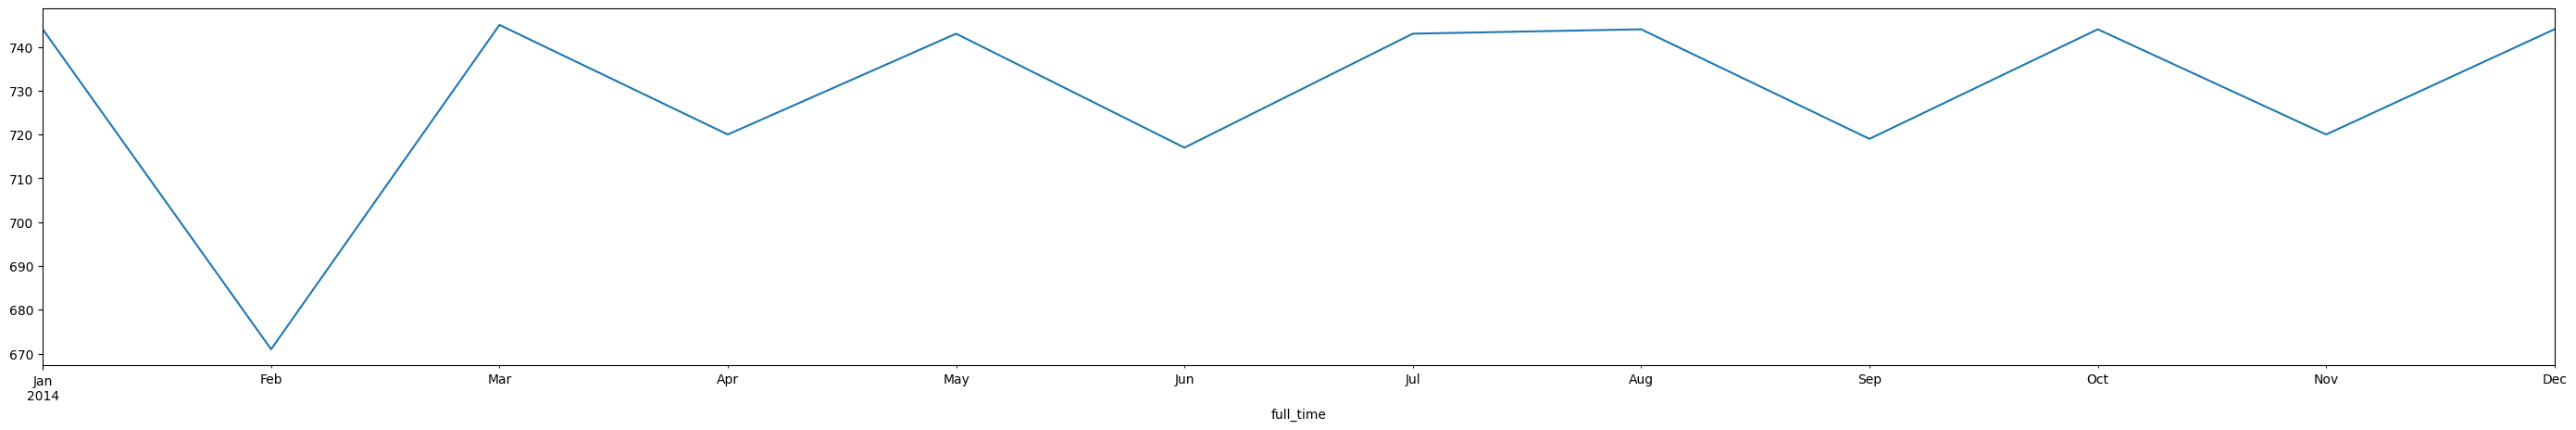

In [28]:
# Lets show monthly visualisation

plt.figure(figsize=(35, 5))
time_series_kwh.resample('1M').count()['kwh'].plot()

In [30]:
# Lets try to change format of our data to make it easier to answer questions

time_series_kwh=time_series_kwh.reset_index()
time_series_kwh.head()

time_series_kwh['weekday'] = time_series_kwh['full_time'].dt.day_name() 
time_series_kwh['month'] = time_series_kwh['full_time'].dt.month_name()
time_series_kwh['time'] = time_series_kwh['full_time'].dt.strftime('%H').astype(int)
time_series_kwh['month_num'] = time_series_kwh['full_time'].dt.strftime('%m').astype(int)

In [32]:
time_series_kwh.head()

,full_time,kwh,weekday,month,time,month_num
0,2014-01-01 00:00:00,0.684,Wednesday,January,0,1
1,2014-01-01 01:00:00,0.340,Wednesday,January,1,1
2,2014-01-01 02:00:00,0.332,Wednesday,January,2,1
3,2014-01-01 03:00:00,0.396,Wednesday,January,3,1
4,2014-01-01 04:00:00,0.388,Wednesday,January,4,1


In [36]:
# Question 1: What is your average hourly electricity usage?


time_series_kwh.describe()

# Answer: 0.782	

,full_time,kwh,time,month_num
count,8754,8754.000000,8754.000000,8754.000000
mean,2014-07-02 11:33:45.359835648,0.781612,11.499543,6.526159
min,2014-01-01 00:00:00,0.048000,0.000000,1.000000
25%,2014-04-02 04:15:00,0.282000,6.000000,4.000000
50%,2014-07-02 12:30:00,0.523000,11.500000,7.000000
75%,2014-10-01 18:45:00,0.994000,17.000000,10.000000
max,2014-12-31 23:00:00,5.141000,23.000000,12.000000
std,NaN,0.759656,6.921460,3.448939


In [38]:
# Question 2: What is your average electricity usage per hour in February?

time_series_kwh[time_series_kwh['month']=='February']['kwh'].mean()

# Answer : 0.834


0.8337347242921013

In [46]:
# Question 3: Which day of the week has the highest average usage?

weekday = time_series_kwh.groupby('weekday')['kwh'].mean().reset_index()
weekday = weekday.sort_values('kwh', ascending=False)
weekday

# Answer : Sunday

,weekday,kwh
3,Sunday,0.898601
2,Saturday,0.890300
0,Friday,0.753744
4,Thursday,0.745752
6,Wednesday,0.733943
1,Monday,0.725437
5,Tuesday,0.724439


In [49]:
# Question 4: What is the highest amount of electricity used in a continuous 4 hour period?

value = []

for i in range(len(time_series_kwh)-3): 
    value.append(time_series_kwh['kwh'].loc[i:i+3].sum()) 

max(value)

# Answer: 17.237

17.237000000000002

In [58]:
# Question 5: Based on your historic electricity usage, what would be your annual cost of
# electricity be under the "Monthly Flex"
# contract?

monthly_flex = []

rate = [0.20, 0.19, 0.17, 0.18, 0.22, 0.27, 0.24, 0.19, 0.18, 0.15, 0.14, 0.19]

for month in time_series_kwh['month'].unique():
    monthly_sum = time_series_kwh.loc[time_series_kwh['month'] == month, 'kwh'].sum()
    monthly_flex.append(monthly_sum * rate[time_series_kwh['month'].unique().tolist().index(month)])

total_flex = sum(monthly_flex)

total_flex

# Answer: 1420


1420.05828

In [61]:
# Question 6: Based on your historic electricity usage, which of the three contracts
# would produce the lowest annual
# cost? 

no_flex = time_series_kwh['kwh'].sum()*0.21

rate = [0.10, 0.10, 0.10 ,0.10 ,0.15 ,0.20, 0.24 ,0.24
       ,0.26, 0.20, 0.20, 0.26, 0.26, 0.20 ,0.24, 0.18, 0.15
       ,0.30, 0.24,0.24,0.12,0.11,0.10, 0.10] 

hourly_flex = []
for f in range(len(time_series_kwh.time.unique())):
    hourly_flex.append(time_series_kwh[time_series_kwh['time']==f]['kwh'].sum()*rate[f])  

print(f'No flex :{no_flex}')
print(f'Monthly Flex: {sum(monthly_flex)}') 
print(f'Hourly Flex: {sum(hourly_flex)}') 

# Answer: Hourly Flex

No flex :1436.86893
Monthly Flex: 1420.05828
Hourly Flex: 1367.84829
